In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("Open Circuit icin 1, Missing Hole icin 2, Mouse Bite icin 3 girin: ")
secim=int(input())

if secim == 1:
    hata="Open_circuit_rotation"
    dosya="01_open_circuit_"
elif secim ==2:
    hata="Missing_hole_rotation"
    dosya="01_missing_hole_"
elif secim ==3:
    hata="Mouse_bite_rotation"
    dosya="01_mouse_bite_"
else:
    quit()

print("01-20 arasi bir sayi girin ")  
sayi=input()


reference_img_path = 'Reference/01.JPG'
test_img_path = 'rotation/'+hata+'/'+dosya+sayi+'.jpg'

Open Circuit icin 1, Missing Hole icin 2, Mouse Bite icin 3 girin: 


 2


01-20 arasi bir sayi girin 


 05


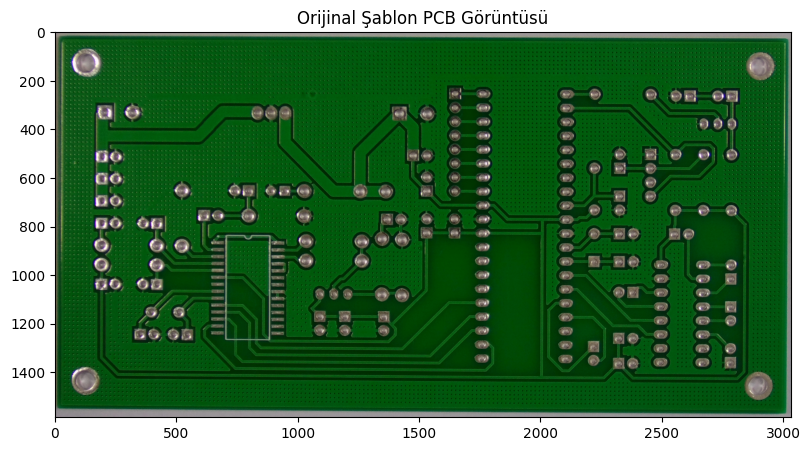

In [14]:
rgb_template_img = cv2.imread(reference_img_path)

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(rgb_template_img, cv2.COLOR_BGR2RGB))
plt.title('Orijinal Şablon PCB Görüntüsü')
plt.show()

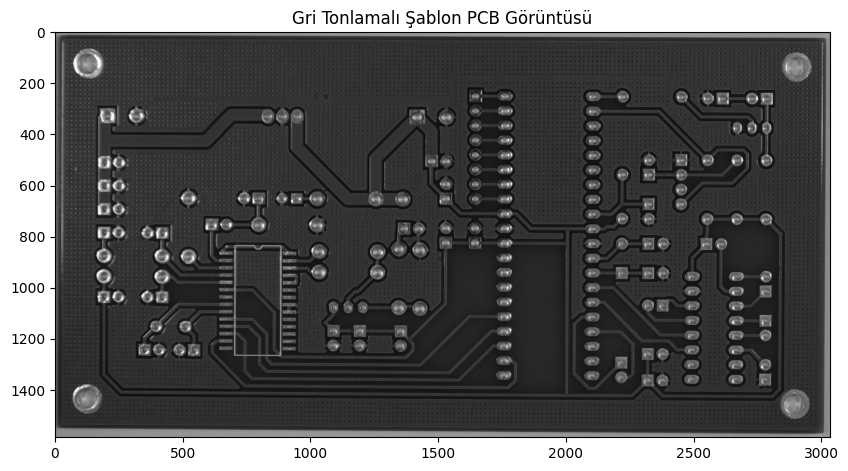

In [15]:
template_img = cv2.imread(reference_img_path, 0)

plt.figure(figsize=(10, 6))
plt.imshow(template_img, cmap="gray")
plt.title('Gri Tonlamalı Şablon PCB Görüntüsü')
plt.show()

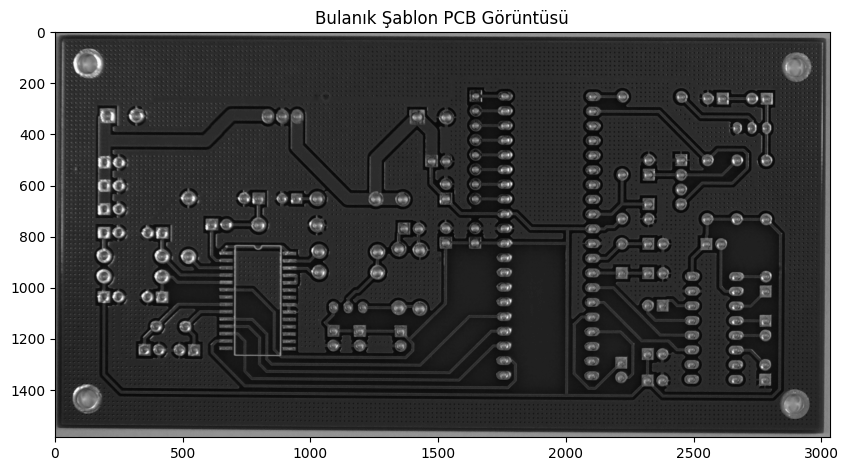

In [5]:
blur_template_img = cv2.GaussianBlur(template_img, (3, 3), 0)

plt.figure(figsize=(10, 6))
plt.imshow(blur_template_img, cmap="gray")
plt.title('Bulanık Şablon PCB Görüntüsü')
plt.show()

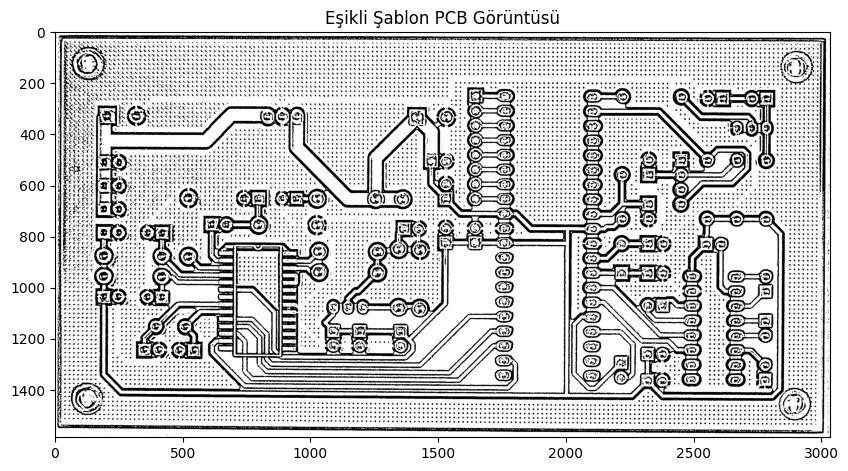

In [6]:
template_adap_thresh = cv2.adaptiveThreshold(blur_template_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 5)

plt.figure(figsize=(10, 6))
plt.imshow(template_adap_thresh, cmap="gray")
plt.title('Eşikli Şablon PCB Görüntüsü')
plt.show()

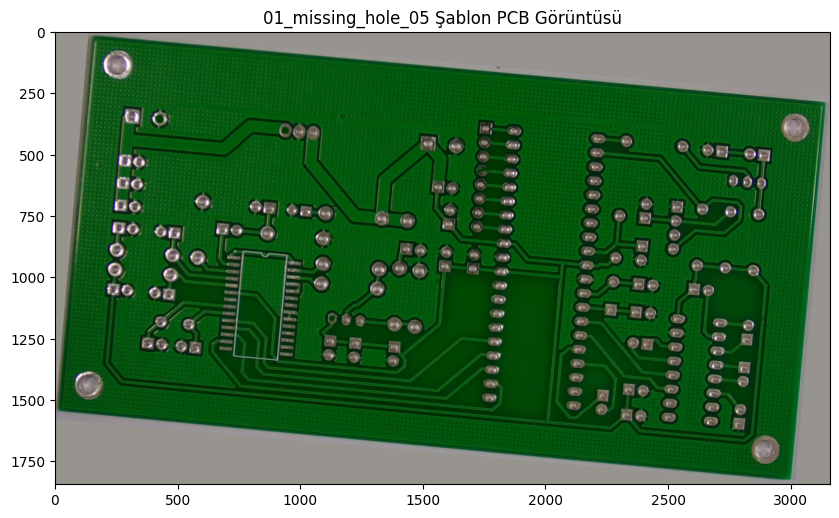

In [7]:
rgb_test_img = cv2.imread(test_img_path)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(rgb_test_img, cv2.COLOR_BGR2RGB))
plt.title(dosya+sayi+' Şablon PCB Görüntüsü')
plt.show()

In [8]:
test_img = cv2.imread(test_img_path, 0)

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(template_img, None)
kp2, des2 = orb.detectAndCompute(test_img, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

num_good_matches = 50
good_matches = matches[:num_good_matches]

points1 = np.zeros((len(good_matches), 2), dtype=np.float32)
points2 = np.zeros((len(good_matches), 2), dtype=np.float32)

for i, match in enumerate(good_matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

height, width = template_img.shape
aligned_test_img = cv2.warpPerspective(test_img, h, (width, height))

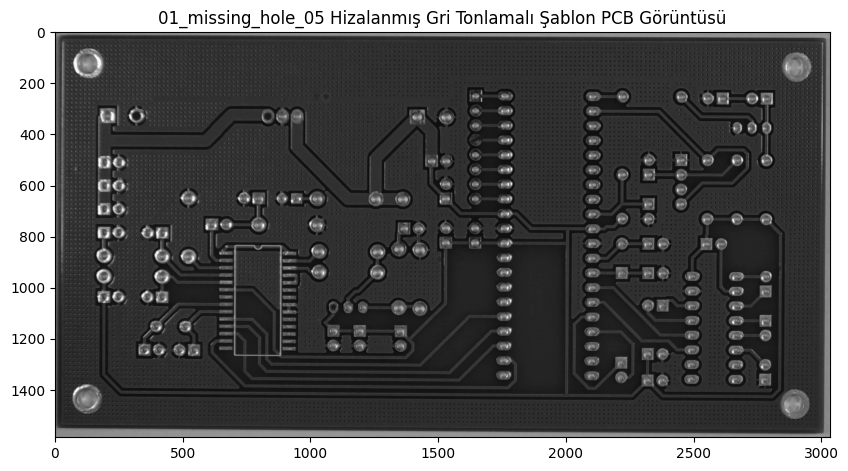

In [9]:
plt.figure(figsize=(10, 6))
plt.imshow(aligned_test_img, cmap="gray")
plt.title(dosya+sayi+' Hizalanmış Gri Tonlamalı Şablon PCB Görüntüsü')
plt.show()


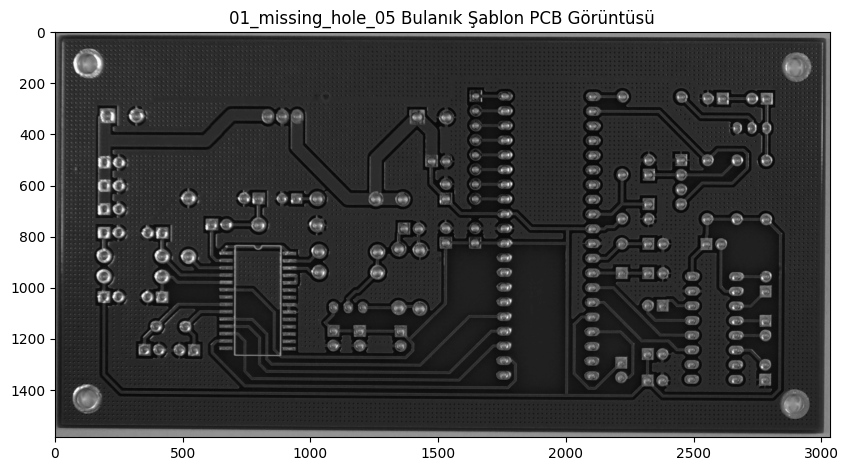

In [10]:
blur_test_img = cv2.GaussianBlur(aligned_test_img, (3, 3), 0)

plt.figure(figsize=(10, 6))
plt.imshow(blur_template_img, cmap="gray")
plt.title(dosya+sayi+' Bulanık Şablon PCB Görüntüsü')
plt.show()

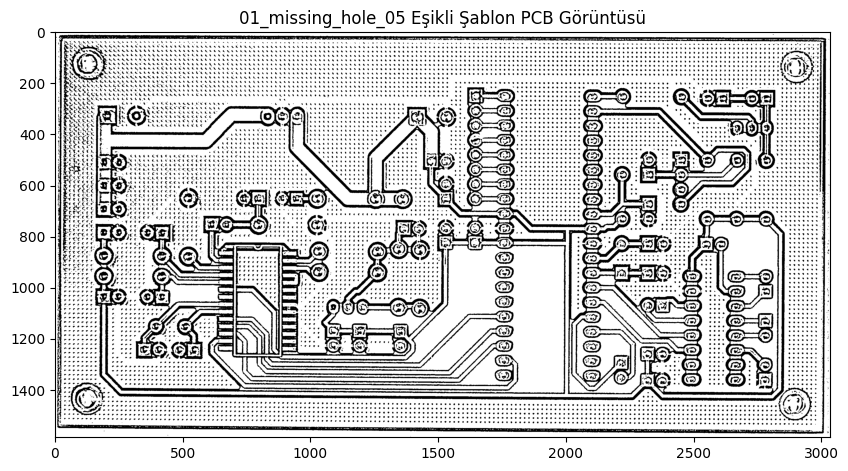

In [11]:
test_adap_thresh = cv2.adaptiveThreshold(blur_test_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 5)

plt.figure(figsize=(10, 6))
plt.imshow(test_adap_thresh, cmap="gray")
plt.title(dosya+sayi+' Eşikli Şablon PCB Görüntüsü')
plt.show()


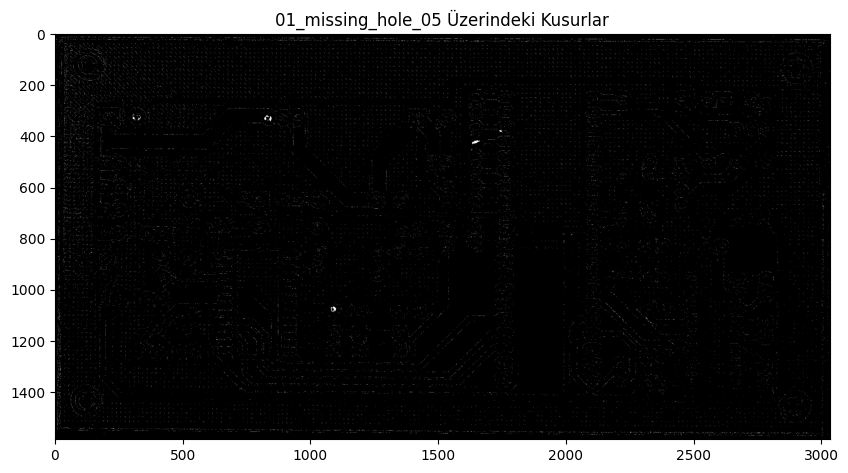

In [12]:
sub_img = cv2.subtract(template_adap_thresh, test_adap_thresh)

plt.figure(figsize=(10, 6))
plt.imshow(sub_img, cmap="gray")
plt.title(dosya+sayi+' Üzerindeki Kusurlar')
plt.show()


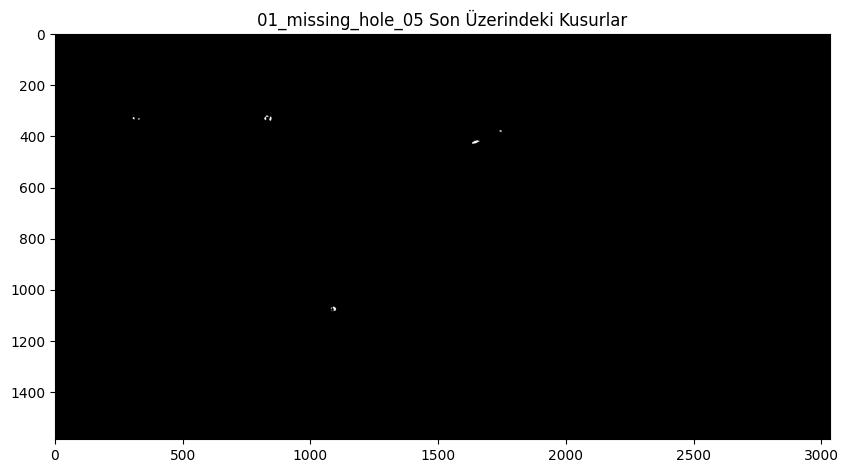

In [16]:
final_img = cv2.medianBlur(sub_img, 5)

plt.figure(figsize=(10, 6))
plt.imshow(final_img, cmap="gray")
plt.title(dosya+sayi+' Son Üzerindeki Kusurlar')
plt.show()